### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [11]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [12]:
df = pd.read_csv('data/training_data.csv')

In [13]:
categorical_features = ['company','director','released','star','year',
                        'writer','original_title','overview','title',
                        'keywords_edited']
continuous_features = ['budget','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [14]:
df['company']=df['company'].astype('category').cat.codes
#df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
#df['genre']=df['genre'].astype('category').cat.codes
#df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [15]:
corr_df=df[all_features].corr()

In [16]:
corr_df

,company,director,star,year,writer,budget,popularity,budget_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,-0.008739,0.023949,-0.024558,0.019211,0.082226,0.058218,0.082226,0.058218,0.024951,0.021075
director,-0.008739,1.000000,0.059354,-0.038766,0.135980,0.002143,0.040468,0.002143,0.040468,-0.021549,0.006500
star,0.023949,0.059354,1.000000,-0.015434,0.020537,0.012727,-0.002471,0.012727,-0.002471,-0.017193,-0.011724
year,-0.024558,-0.038766,-0.015434,1.000000,-0.028339,0.236674,0.210115,0.236674,0.210115,-0.048571,-0.111519
writer,0.019211,0.135980,0.020537,-0.028339,1.000000,-0.039109,-0.016903,-0.039109,-0.016903,-0.019012,0.003719
budget,0.082226,0.002143,0.012727,0.236674,-0.039109,1.000000,0.366008,1.000000,0.366008,-0.052917,-0.112100
popularity,0.058218,0.040468,-0.002471,0.210115,-0.016903,0.366008,1.000000,0.366008,1.000000,0.204128,0.208967
budget_norm,0.082226,0.002143,0.012727,0.236674,-0.039109,1.000000,0.366008,1.000000,0.366008,-0.052917,-0.112100
popularity_norm,0.058218,0.040468,-0.002471,0.210115,-0.016903,0.366008,1.000000,0.366008,1.000000,0.204128,0.208967
isprofit,0.024951,-0.021549,-0.017193,-0.048571,-0.019012,-0.052917,0.204128,-0.052917,0.204128,1.000000,0.783811


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

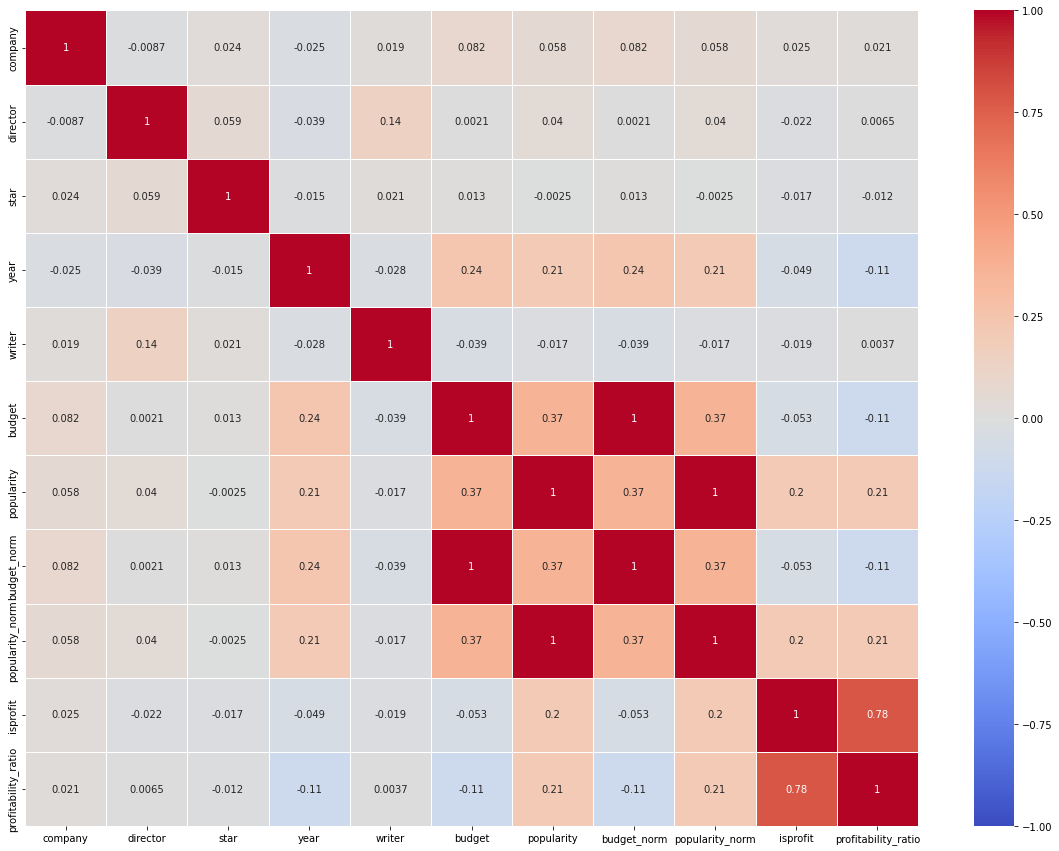

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [18]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,9]<-0.04 or corr_df.iloc[i,9]>0.04 or \
        corr_df.iloc[i,10]<-0.04 or corr_df.iloc[i,10]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [19]:
corr_df_features

{'budget', 'budget_norm', 'popularity', 'popularity_norm', 'year'}

In [20]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')